# **Project No:** *3*</font><br/>
# **Title:** <font color='red'>*Desired Area's Illumination Pattern by adjusting Lumens' Power using the Least Squares Method*</font><br/><br/>


[PART 1](#part1) (Data Preparation):
* [Libraries](#li)
* [User-Defined Variables](#var)
* [Grid Creation](#gc)
* [Distance Computation](#dc)
* [Data Transformation](#dt)

[PART 2](#part2) (Tasks):
  * [Task 1](#t1) (Lumen Optimization)
  * [Task 2](#t2) (Lumen Histograms)
  * [Task 3](#t3) (Lumen Optimization with Constraints)
  * [Task 4](#t4) (Lumen Optimization with Constraints & Lamp Relocation)

<br>

# References
* [Introduction to Applied Linear Algebra](https://github.com/geoav74/aueb_projects/blob/main/numerical_opt_%26_large-scale_linear_algebra/vmls.pdf)

<a name="part1"></a>
# <font color='green'>**PART 1**

<a name="li"></a>
>## **Libraries**

In [ ]:
import numpy as np
import math
import random

from scipy import optimize
from scipy.optimize import nnls
from scipy.optimize import minimize

import matplotlib.pyplot as plt
import matplotlib.colors as mcol
%matplotlib inline

<a name="var"></a>
>## **User-Defined Variables**

In [ ]:
# number of lamps in the area
n = 10

# the dimensions of our area will be 25x25
N = 25

# the area lamps are covering e.g squared meters
m = N * N

# x,y,z coordinates of the lamps
lamps = np.array([
                  [4.1, 20.4, 4],
                  [14.1, 21.3, 3.5],
                  [22.6, 17.1, 6],
                  [5.5, 12.3, 4],
                  [12.2, 9.7, 4],
                  [15.3, 13.8, 6],
                  [21.3, 10.5, 5.5],
                  [3.9, 3.3, 5],
                  [13.1, 4.3, 5],
                  [20.3, 4.2, 4.5]
                  ])

# variable concerning Part4 regarding the number of simulations to conduct
num_of_simulations = 1000

# colorset for the heatmaps
cm1 = mcol.LinearSegmentedColormap.from_list("BlueYellowRed", ["b","y","r"])

<a name="gc"></a>
>## **Grid Creation**

In [ ]:
# creating a grid matrix to work on
nx, ny = (N, N) # dimensions of our grid
x = np.linspace(0.5, 24.5, nx) # creating the center of pixels in x-axis
y = np.linspace(0.5, 24.5, ny)  # creating the y-coordinates of pixels-center
xx, yy = np.meshgrid(x, y, indexing='ij') # getting our grid coordinates

<a name="dc"></a>
>## **Distance Computation**

In [ ]:
def find_distances(x, y, lamps):
  '''
  USAGE: this function estimates the distances (d^2) from each lamp to every pixel-center of our grid
  TODO: 1. iterate each lamp
        2. iterate the pixels' coordinates
            * compute the squared euclidean distance from a lamp to a pixel's center
            * store the distances for a lamp
        3. store each lamp's distances
  INPUT:
          @x : the x-axis coordinates
          @y : the y-axis coordinates
          @lamps: a list containing the 3-d coordinates of each lamp
  OUTPUT:
          a list containing the distances from every lamp to each pixel-center of the grid
  '''
  dists = []    # a list to store distances per lamp

  for lamp in range(len(lamps)):  # iterating every lamp

    dist = []  # a list to store the distances of a lamp

    for i in range(len(x)):    # iterating the x-axis of the grid

      d = []  # a list to store the distances from the lamp to each y-axis pixel's coordinates

      for j in range(len(y)):    # iterating the y-axis coordinates of the pixel

        # using the euclidean distance in 3-d coordinates betwwen a lamp and the center of a pixel
        sd = (x[i,j] - lamps[lamp][0])**2 + (y[i,j] - lamps[lamp][1])**2 + (0 - lamps[lamp][2])**2
        d.append(sd)     # appending each pixel's distance to the lamp in y-axis
      dist.append(d)       # appending the distances of x-axis to the lamp's list
    dists.append(dist)     # appending the distances of a lamp to the list of lamps

  return dists

<a name="dt"></a>
>## **Data Transformation**

In [ ]:
# tranforming the distances into a 3-d array
a = find_distances(xx, yy, lamps)
A = np.array(a)
A.shape

(10, 25, 25)

In [ ]:
# reshaping the distance 3-d array to our favors 2-d
K = np.reshape(A, (n,m))
K.shape

(10, 625)

In [ ]:
K[0, :25]

array([424.97, 386.17, 349.37, 314.57, 281.77, 250.97, 222.17, 195.37,
       170.57, 147.77, 126.97, 108.17,  91.37,  76.57,  63.77,  52.97,
        44.17,  37.37,  32.57,  29.77,  28.97,  30.17,  33.37,  38.57,
        45.77])

In [ ]:
# getting the illumination decays as an inverse square law
c = 1. / K

# scaling the elements of the array
illum_decays = (m/np.sum(c)) * c
illum_decays.shape

(10, 625)

<a name="part2"></a>
# <font color='red'>**PART 2**

<a name="t1"></a>
>## **Task 1** (Lumen Optimization)



In [ ]:
# plotting room-lit after optimization
lights = np.matmul(illum_decays.T, np.ones(n) )

In [ ]:
def heatgraph(intensity, title, lmp):
  fig = plt.figure(figsize=(6,6))
  im = plt.imshow(intensity.reshape(N, N), origin="lower", cmap=cm1)
  plt.scatter(lmp[:, 1], lmp[:, 0], c='black')
  plt.colorbar(im);
  plt.axis('scaled')
  plt.title(title)

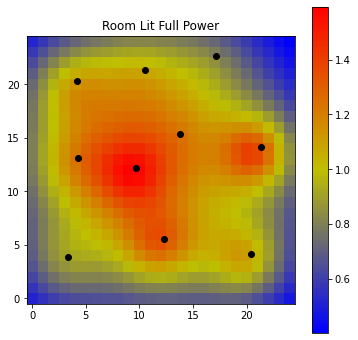

In [ ]:
heatgraph(lights, 'Room Lit Full Power', lamps)

In [ ]:
# Solve the least squares problem
p = np.linalg.lstsq(illum_decays.T, np.ones(m), rcond=None)

In [ ]:
p[0], p[0].shape

(array([1.46211018, 0.78797433, 2.96641047, 0.74358042, 0.08317333,
        0.21263945, 0.21218408, 2.05114815, 0.90760315, 1.47222464]), (10,))

In [ ]:
rmse_init = (sum((illum_decays.T @ np.ones(n) - 1)**2)/m)**0.5
print(f'rmse initially: {rmse_init:.4f}')

rmse initially: 0.2417


In [ ]:
rmse0 = (sum((illum_decays.T @ p[0] - 1)**2)/m)**0.5
print(f'rmse when full power: {rmse0:.4f}')

rmse when full power: 0.1404


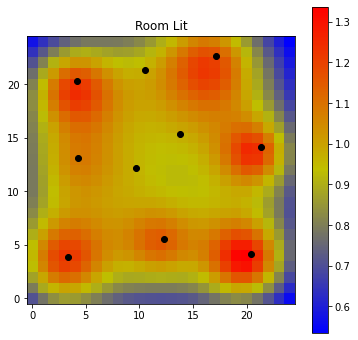

In [ ]:
# plotting room-lit after optimization
lights2 = np.matmul(np.asarray(p[0]), illum_decays)

heatgraph(lights2, 'Room Lit', lamps)

<a name="t2"></a>
>## **Task 2** (Lumen Histograms)

In [ ]:
# creating a histogram with the lit-values full power
def histogram(intensity, title):
  plt.figure(figsize=(6,6))
  plt.hist(intensity, bins = 10, rwidth=0.95)
  plt.xlabel('Intensity')
  plt.ylabel('Number of Pixels')
  plt.title(title)

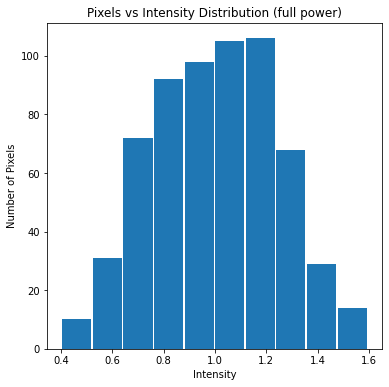

In [ ]:
histogram(lights, 'Pixels vs Intensity Distribution (full power)')

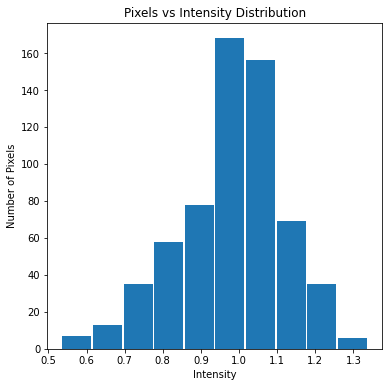

In [ ]:
histogram(lights2, 'Pixels vs Intensity Distribution')

We observe that most of the illumination values are near the target level 1 normally distributed.

<a name="t3"></a>
>## **Task 3** (Lumen Optimization with Constraints)

In [ ]:
def ls_with_constrains(A, b):
  '''
  USAGE: to perform optimization under constraints and boundaries using the LS algorithm
  TODO: 1. setting the boundaries and constraints for the power values (positive numbers, sum to 10)
        2. invoke the LS algorithm to get a first guess
        3. invoke an optimization method under predefined minimization function, constraints and boundaries
        4. present the new power values of the lamps summing to 10
  INPUT:
        @A: nxm array containing the lumen decays
        @b: mx1 array with ones
  OUTPUT:
        the new power values and coresponding rmse
  '''
  # setting constraints and boundaries
  cons = {'type': 'eq', 'fun': lambda x:  np.sum(x) - 10}
  bounds = [[0., np.inf]]

  #Use nnls to get initial guess
  x0, _ = nnls(A.T, b)

  #Call minimisation subject to these values
  minout = minimize(lambda x: 0.5 * np.sum((A.T @ x - b)**2), x0, method='SLSQP', bounds=bounds, constraints=cons)
  x = minout.x # retrieving the new power values

  rmse = (sum((A.T @ x - 1)**2)/m)**0.5

  print(f'The new power values of the lamps (p) are :\n{x}\n\nThe sum is: {x.sum():.4f}\n')
  print(f'RMSE : {rmse}')
  return x, rmse

In [ ]:
# execute optimization
power_opt1, rmse_opt1 = ls_with_constrains(illum_decays, np.ones(m))

The new power values of the lamps (p) are :
[1.33959662 0.8942094  2.36802552 0.7791348  0.31890347 0.
 0.39535486 1.76364193 0.76043222 1.38070118]

The sum is: 10.0000

RMSE : 0.15576037436245962


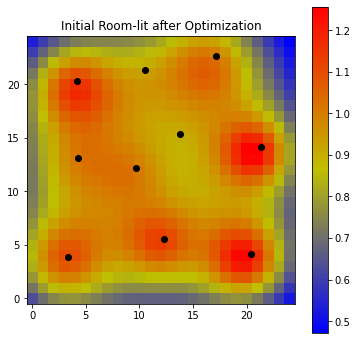

In [ ]:
# plotting room-lit after optimization
lights3 = np.matmul(np.asarray(power_opt1), illum_decays )

heatgraph(lights3, 'Initial Room-lit after Optimization', lamps)

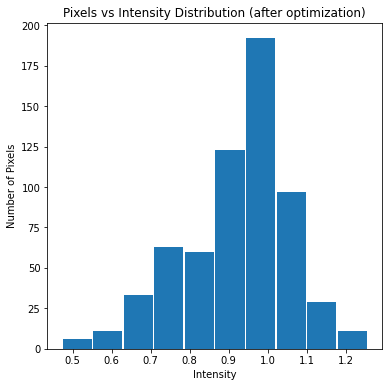

In [ ]:
histogram(lights3, 'Pixels vs Intensity Distribution (after optimization)')

<a name="t4"></a>
>## **Task 4** (Lumen Optimization with Constraints & Lamp Relocation)

In [ ]:
def modify_lamps_location(lmps):
  '''
  USAGE: to modify the lamps' location in 3-d
  TODO: 1.  claim random numbers for the x,y,z coordinates
        2.  combine those computed numbers to compose the x,y,z coordinates for each lamp
        3.  return an array containg the new lamps' 3-d coordinates
  INPUT:
        @lmps: a set of lamps
  OUTPUT:
        an array containg new 3-d coordinates for the lamps
  '''
  lmps_new = []
  posX = []
  posY = []
  posZ = []

  for i in range(len(lmps)):
    posX.append(round(random.uniform(0, N), 1))
    posY.append(round(random.uniform(0, N), 1))
    posZ.append(round(random.uniform(4, 6), 1))

  for (x,y,z) in zip(posX, posY, posZ):
    lmps_new.append([x,y,z])

  return np.array(lmps_new)

In [ ]:
def opt(lmp, x, y):
  '''
  USAGE: to run a whole process of optimization for lamp powers
  TODO: 1.  calculate the distances between pixels and lamps using the pixels'
            coordinates and the given lamps' locations
        2.  tranform the lumen decays array to our favor shape
        3.  calculate the lumen decays
        4.  scaling the lumen decays
        5.  perform least sqares method to optimize the lamps' powers
        6.  return findings to the user
  INPUT:
          @lmp: lamps' coordinates
          @x  : x-axis coordinates
          @y  : y-axis coordinates
  OUTPUT:
          power & rmse after optimization
  '''
  # getting the distances
  a1 = find_distances(x, y, lmp)

  # tranforming the distance array
  A1 = np.array(a1)
  K1 = np.reshape(A1, (n,m))

  # getting the illumination decays as an inverse square law
  c1 = 1. / K1

  # scaling the elements of the array
  illum1_decays = (m/np.sum(c1)) * c1

  # performing the optimization
  power, rmse = ls_with_constrains(illum1_decays, np.ones(m))

  return power, rmse

In [ ]:
def simulation(lmps, x, y, sim):
  '''
  USAGE: to simulate relocation of a number of lamps and perform optimization
  TODO: 1. modify the lamps' coordinates
        2. perform optimization
        3. return the simulations back to the user
  INPUT:
        @lmps: a list of lamps providing (x,y,z) coordinates
        @x: the x-axis coordinates of the pixels' centers
        @y: the y-axis coordinates of the pixels' centers
        @sim: the number of simulations to conduct
  OUTPUT:
        power values, rmse and lamps' configuration for each simulation
  '''
  data = []

  for i in range(sim):
    print(f'---------- Simulation No: {i} ----------')
    modified_lamps = modify_lamps_location(lmps.copy())
    power_opt2, rmse_opt2 = opt(modified_lamps, x, y)
    data.append((power_opt2, rmse_opt2, modified_lamps))
    print('-----------------------------------------\n')
    #if rmse_opt2 < rmse0:
      #break

  return data

In [ ]:
# execute simulation
simulation_results = simulation(lamps, xx, yy, num_of_simulations)

Streaming output truncated to the last 5000 lines.
[2.47718393e-01 2.09251019e-17 1.83766449e+00 1.59647870e+00
 1.68873049e-01 4.04342780e-01 9.86939117e-01 1.49621470e+00
 8.92871991e-01 2.36889677e+00]

The sum is: 10.0000

RMSE : 0.2481058350258388
-----------------------------------------

---------- Simulation No: 534 ----------
The new power values of the lamps (p) are :
[8.57949095e-01 7.70351557e-01 6.50521303e-19 1.01676266e+00
 1.79860861e+00 2.97948332e-01 2.27998558e+00 2.04798616e+00
 9.08599168e-01 2.18088363e-02]

The sum is: 10.0000

RMSE : 0.16094515754135152
-----------------------------------------

---------- Simulation No: 535 ----------
The new power values of the lamps (p) are :
[0.10153903 1.22890372 1.52511742 1.92243342 0.08627345 1.03533546
 2.39774076 0.37453086 1.32812588 0.        ]

The sum is: 10.0000

RMSE : 0.2049658776395584
-----------------------------------------

---------- Simulation No: 536 ----------
The new power values of the lamps (p) are :

In [ ]:
def find_best(simulations, init_rmse):
  '''
  USAGE: to compare simulation results and return the best one
  TODO: 1.  find the best performance (min rmse) and store the results
        2.  using the best perfomance's index (if found) compare it with
            the initial opt and the optimazation under constraints results
            * if the best performance is lower than the first attempt then
              print appropriate message
            * else present the first best performance
        3.  return back to the user the lamps' power and their configuration
  INPUT:
        @simulations:  the data we've collected from the simulation
        @init_rmse: initial rmse
  OUTPUT:
        1.  the best lamps' power
        2.  the new lamps' configuration
  '''
  power = []
  rmses = []
  configuration = []

  for i in range(len(simulations)):
    power.append(simulations[i][0])
    rmses.append(simulations[i][1])
    configuration.append(simulations[i][2])

  m = min(rmses)
  idx = rmses.index(m)

  if m > init_rmse:
    print('The simulation did not give us better results')
  else:
    print(f'The best performance found comes from simulation #{idx}\n')
    print(f'RMSE {m:.4f}\n')
    print(f'power values are:\n{power[idx]}\n')
    print(f'The lamps configuration is:\n{configuration[idx]}')

  return power[idx], configuration[idx]

In [ ]:
# retrieving the best performance if any
best_power, best_conf = find_best(simulation_results, rmse0)

The best performance found comes from simulation #17

RMSE 0.1143

power values are:
[0.03072066 1.25464322 1.14529782 0.99881509 0.39634243 0.98029958
 2.00228845 1.23869354 0.47542134 1.47747787]

The lamps configuration is:
[[14.9  3.3  5.9]
 [ 2.   6.   5.2]
 [ 9.7  3.   5.8]
 [20.8 13.2  4.3]
 [ 1.6  3.2  5.4]
 [ 7.3 18.8  4.8]
 [18.4 24.4  5.4]
 [ 1.5 23.1  5. ]
 [11.7 10.8  4.9]
 [20.6  2.6  4.9]]


In [ ]:
# getting the distances
a2 = find_distances(xx, yy, best_conf)

# tranforming the distance array
A2 = np.array(a2)
K2 = np.reshape(A2, (n,m))

# getting the illumination decays as an inverse square law
c2 = 1. / K2

# scaling the elements of the array
illum2_decays = (m/np.sum(c2)) * c2

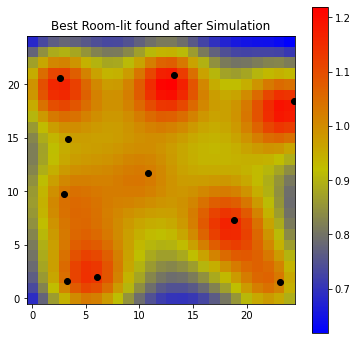

In [ ]:
# plotting room-lit after optimization
lights5 = np.asarray(best_power) @ illum2_decays

heatgraph(lights5, 'Best Room-lit found after Simulation', best_conf)

Text(0.5, 1.0, 'Pixels vs Intensity Distribution after Simulation')

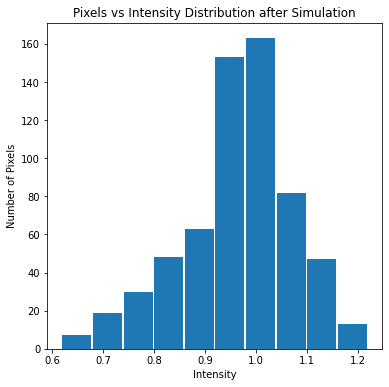

In [ ]:
# creating a histogram with the lit-values after optimization
plt.figure(figsize=(6,6))
plt.hist(lights5, bins = 10, rwidth=0.95)
plt.xlabel('Intensity')
plt.ylabel('Number of Pixels')
plt.title('Pixels vs Intensity Distribution after Simulation')